<a href='https://www.darshan.ac.in/'> <img src='https://www.darshan.ac.in/Content/media/DU_Logo.svg' width="250" height="300"/></a>
<pre>
<center><b><h1>Machine Learning - 2301CS621</b></center>

<center><b><h1>Lab - 9 </b></center>
<center><b><h3>K-means, K-Medoids</b></center>
Name : Nisarg Kaneriya
Enrollment :22010101086
<pre>    

# Step 1: Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids

In [3]:
%pip install scikit-learn-extra

  Using cached scikit_learn_extra-0.3.0-cp312-cp312-macosx_10_9_universal2.whl
Note: you may need to restart the kernel to use updated packages.


# Step 2: Load the Dataset
Load Given dataset -  StudentsPerformance.csv

In [2]:
df = pd.read_csv('StudentsPerformance.csv')
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [3]:
df.shape

(1000, 8)

# Step 3: Data Overview
In this step, we examine the dataset structure, summary statistics, and check for missing values.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [6]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [7]:
df.corr(numeric_only=True)

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


# Step 4: Display PairPlot

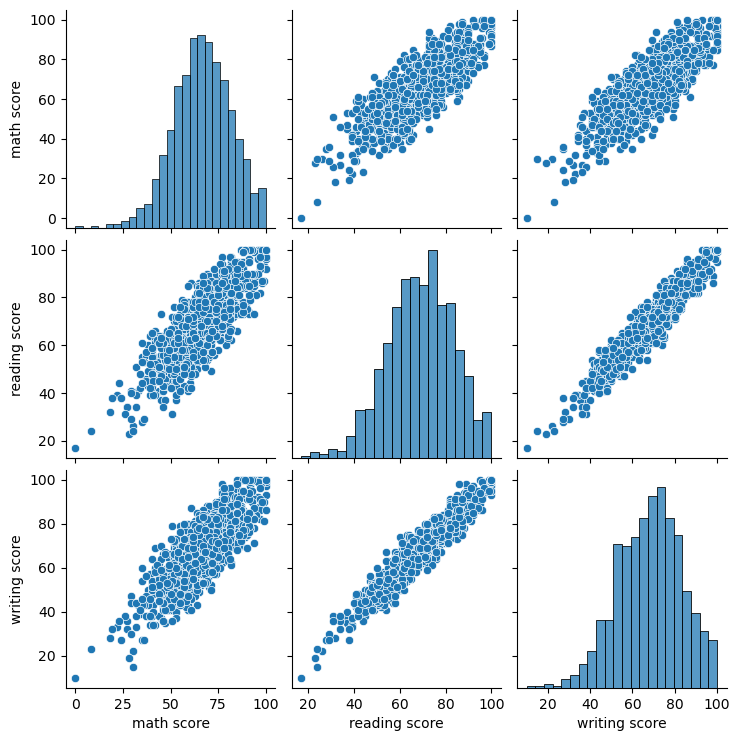

In [8]:
sns.pairplot(df)

# Step 5: Correlation heatmap

<Axes: >

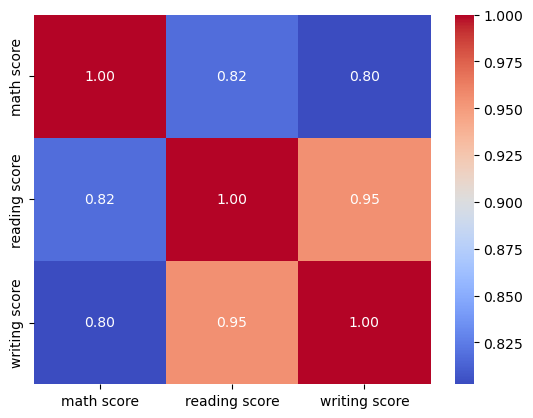

In [9]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')

# Step 6: Distribution of numerical features

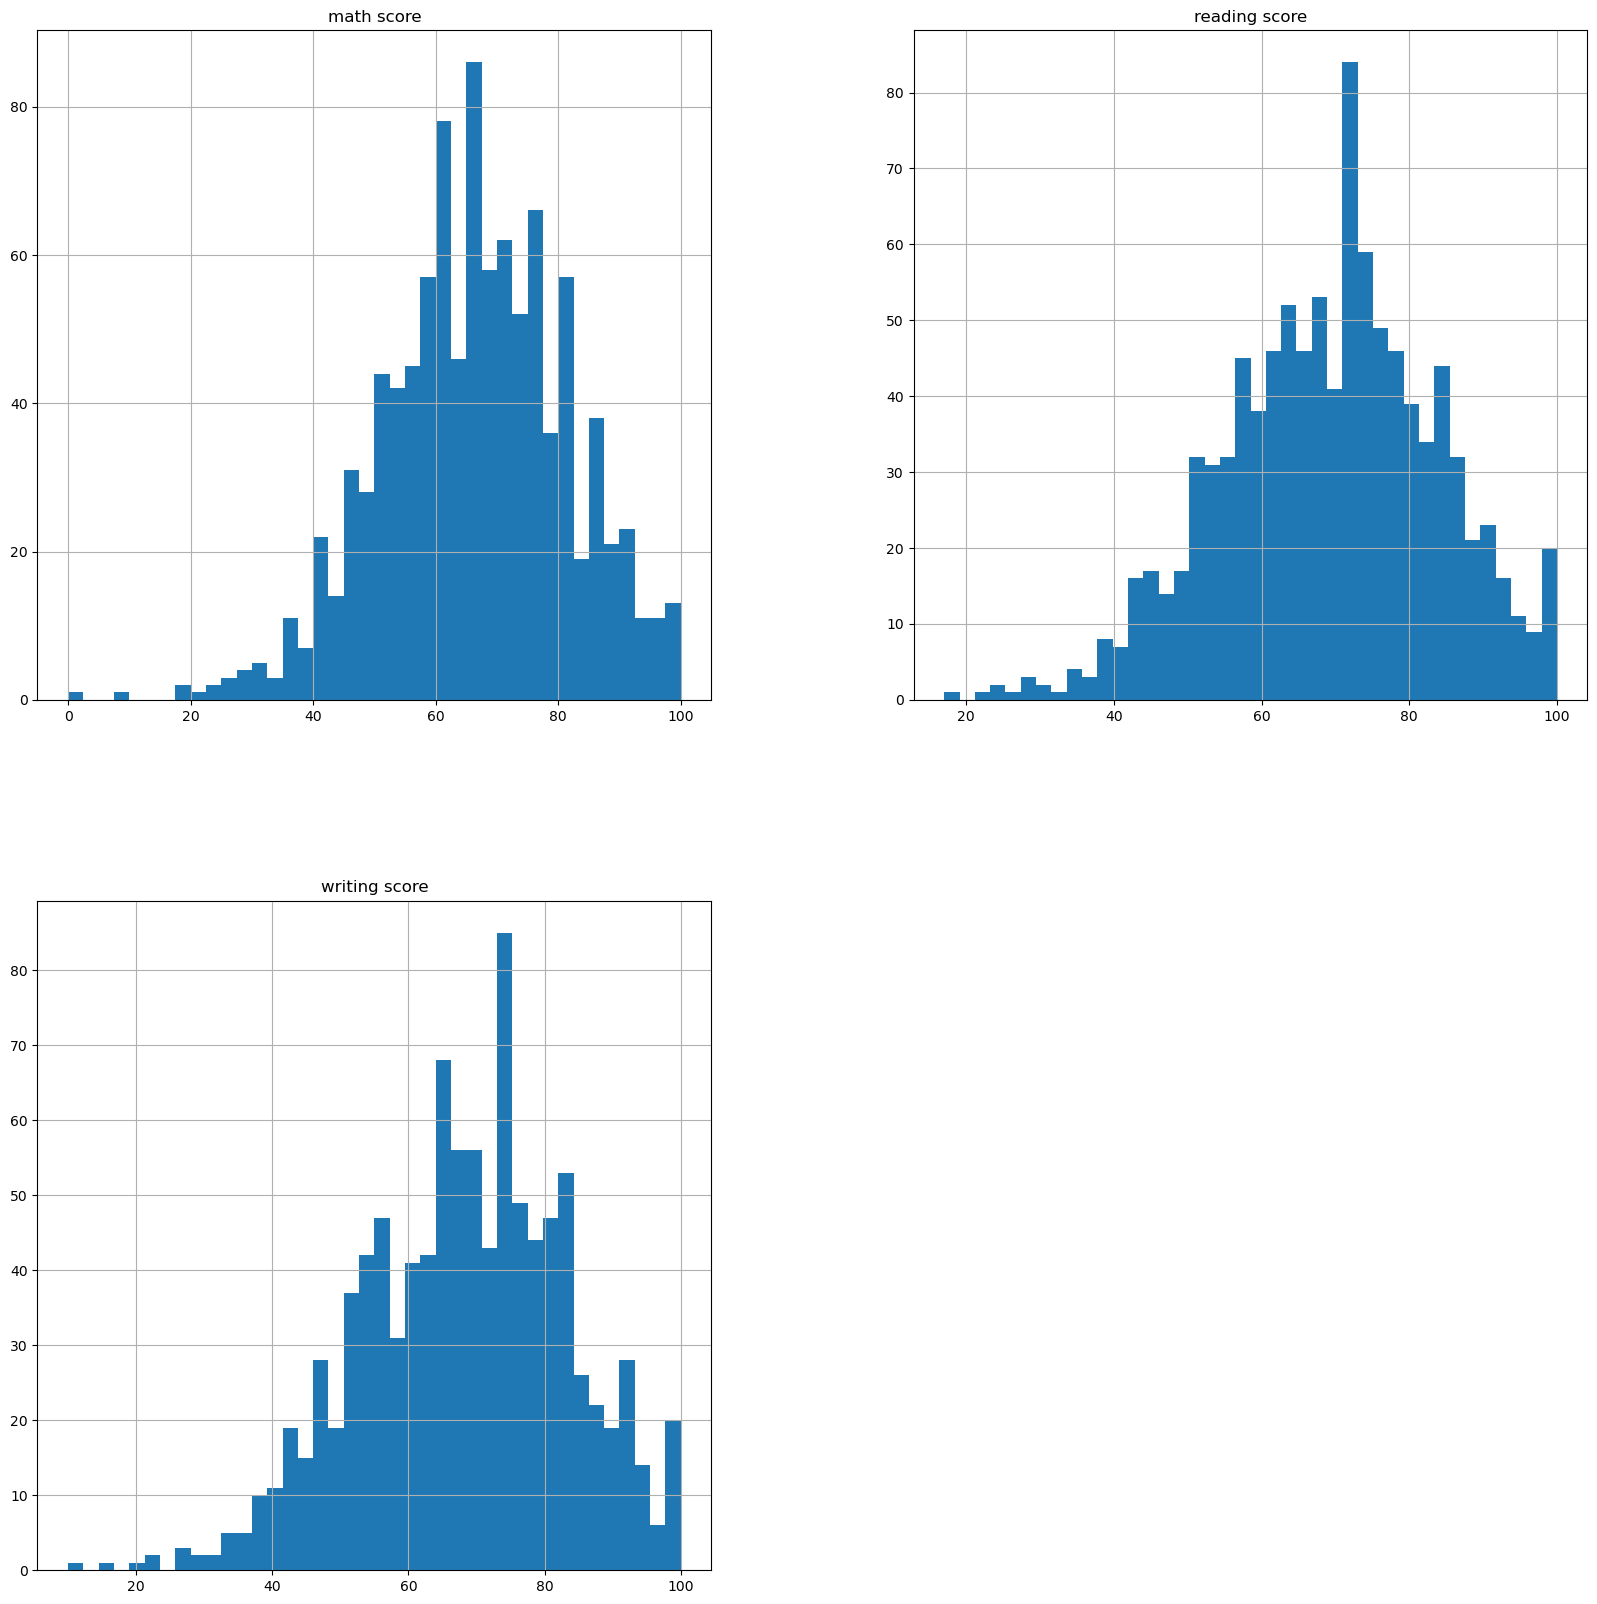

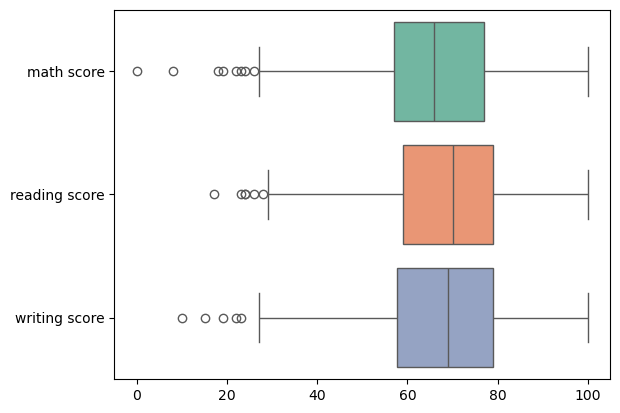

In [10]:
df.hist(bins=40, figsize=(20, 20))
plt.show()

sns.boxplot(data=df.select_dtypes(include=["float", "int"]), orient='h', palette='Set2')
plt.show()

# Step 7: Apply StandardScaler

In [11]:
ss = StandardScaler()
X = df.select_dtypes(include=["float", "int"])
X_Scaled = ss.fit_transform(X)

In [12]:
X_Scaled

array([[ 0.39002351,  0.19399858,  0.39149181],
       [ 0.19207553,  1.42747598,  1.31326868],
       [ 1.57771141,  1.77010859,  1.64247471],
       ...,
       [-0.46775108,  0.12547206, -0.20107904],
       [ 0.12609287,  0.60515772,  0.58901542],
       [ 0.71993682,  1.15336989,  1.18158627]])

# Step 8: Elbow method to find optimal k

In [13]:
import torch
import torch.backends.mps

device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
print("Using device:", device)

Using device: mps


In [14]:
dis = []
for k in range(1, 11):
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(X_Scaled)
    dis.append(model.inertia_)


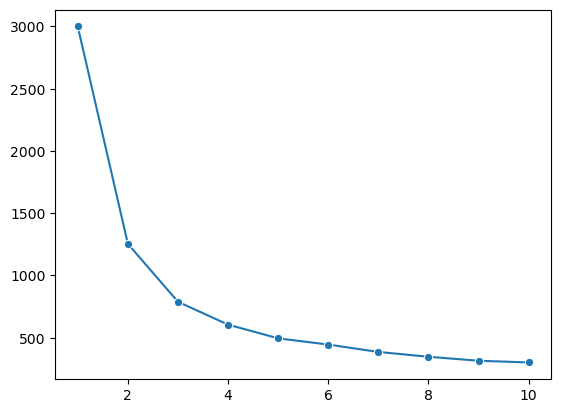

In [15]:
sns.lineplot(x=range(1,11), y=dis, marker='o')
plt.show()


# Step 9:Based on the elbow plot, choose an appropriate k value (e.g., k=3)

In [16]:
model = KMeans(n_clusters=3, random_state = 42)
model.fit(X_Scaled)

KMeans(n_clusters=3, random_state=42)

# Step 10: Print Cluster Center

In [17]:
model.cluster_centers_

array([[-0.04951336, -0.04870596, -0.01529686],
       [-1.18720058, -1.26762535, -1.28838441],
       [ 1.03099793,  1.09485536,  1.06358515]])

# Step 11: Plot Cluster

In [18]:
df['KMeans']=model.labels_
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,KMeans
0,female,group B,bachelor's degree,standard,none,72,72,74,0
1,female,group C,some college,standard,completed,69,90,88,2
2,female,group B,master's degree,standard,none,90,95,93,2
3,male,group A,associate's degree,free/reduced,none,47,57,44,1
4,male,group C,some college,standard,none,76,78,75,2
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,2
996,male,group C,high school,free/reduced,none,62,55,55,1
997,female,group C,high school,free/reduced,completed,59,71,65,0
998,female,group D,some college,standard,completed,68,78,77,0


In [19]:
df['KMeans'].value_counts()

KMeans
0    443
2    308
1    249
Name: count, dtype: int64

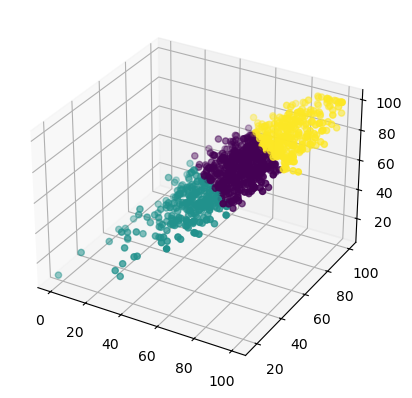

In [20]:
ax = plt.axes(projection='3d')
ax.scatter3D(df['math score'], df['reading score'], df['writing score'], c=df["KMeans"], cmap='viridis')

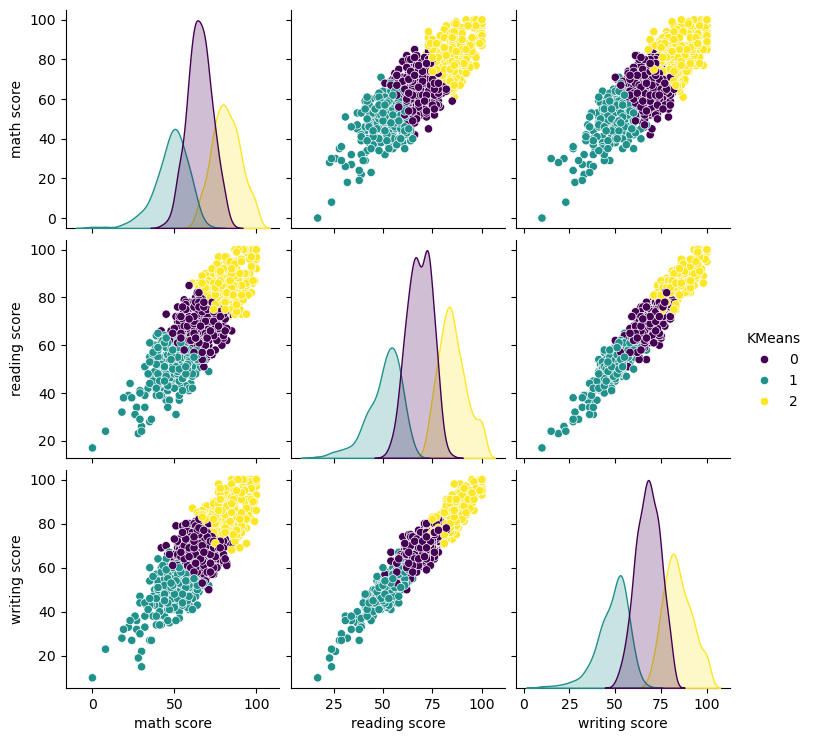

In [21]:
sns.pairplot(
    data=df,
    vars=["math score", "reading score", "writing score"],
    hue="KMeans",
    palette="viridis"
)
plt.show()

# Step 12:Analyze clusters 

In [22]:
df[df['KMeans']==1].describe()

,math score,reading score,writing score,KMeans
count,249.000000,249.000000,249.000000,249.0
mean,48.096386,50.670683,48.485944,1.0
std,10.305355,8.552258,8.711829,0.0
min,0.000000,17.000000,10.000000,1.0
25%,43.000000,46.000000,44.000000,1.0
50%,49.000000,52.000000,51.000000,1.0
75%,55.000000,57.000000,54.000000,1.0
max,71.000000,65.000000,67.000000,1.0


In [23]:
df[df['KMeans']==0].describe()

,math score,reading score,writing score,KMeans
count,443.00000,443.000000,443.000000,443.0
mean,65.33860,68.458239,67.821670,0.0
std,7.51126,6.071217,6.518493,0.0
min,42.00000,51.000000,50.000000,0.0
25%,60.00000,64.000000,63.000000,0.0
50%,65.00000,68.000000,68.000000,0.0
75%,70.00000,73.000000,73.000000,0.0
max,85.00000,85.000000,82.000000,0.0


In [24]:
df[df['KMeans']==2].describe()

,math score,reading score,writing score,KMeans
count,308.000000,308.000000,308.000000,308.0
mean,81.714286,85.146104,84.207792,2.0
std,8.533677,6.865489,7.514308,0.0
min,61.000000,72.000000,68.000000,2.0
25%,75.000000,80.000000,79.000000,2.0
50%,81.000000,84.000000,83.000000,2.0
75%,88.000000,90.000000,90.000000,2.0
max,100.000000,100.000000,100.000000,2.0


In [25]:
df['Total'] = df['math score'] + df['reading score'] + df['writing score']
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,KMeans,Total
0,female,group B,bachelor's degree,standard,none,72,72,74,0,218
1,female,group C,some college,standard,completed,69,90,88,2,247
2,female,group B,master's degree,standard,none,90,95,93,2,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,1,148
4,male,group C,some college,standard,none,76,78,75,2,229
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,2,282
996,male,group C,high school,free/reduced,none,62,55,55,1,172
997,female,group C,high school,free/reduced,completed,59,71,65,0,195
998,female,group D,some college,standard,completed,68,78,77,0,223


In [26]:
gdf=df.groupby('KMeans')

In [27]:
for index, group in gdf:
    print(f"Cluster {index}")
    print(f"Max : {group['Total'].min()}, Min: {group['Total'].max()}")
    print(f"Mean:{group['Total'].mean()}")
    print('--------------------------------')

Cluster 0
Max : 175, Min: 226
Mean:201.61851015801355
--------------------------------
Cluster 1
Max : 27, Min: 175
Mean:147.25301204819277
--------------------------------
Cluster 2
Max : 226, Min: 300
Mean:251.0681818181818
--------------------------------


# Step 13: Perform K-Medoids

In [28]:
model2 = KMedoids(n_clusters=3, random_state=50)
model2.fit(X_Scaled)

KMedoids(n_clusters=3, random_state=50)

In [29]:
X_Scaled[model2.medoid_indices_]

array([[-0.00587246,  0.19399858,  0.12812699],
       [-0.99561237, -0.90242577, -0.99117351],
       [ 0.9178848 ,  1.08484337,  1.11574507]])

In [30]:
model2.labels_

array([0, 2, 2, 1, 0, 2, 2, 1, 0, 1, 1, 1, 0, 0, 1, 0, 2, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 2, 2, 2, 1, 2, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 2, 1, 0, 1, 2, 2, 1, 2, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 2, 0, 0, 1, 1, 1, 0, 1, 2, 2, 0,
       0, 2, 0, 1, 0, 1, 2, 2, 0, 0, 0, 0, 0, 0, 2, 1, 2, 0, 2, 0, 0, 0,
       2, 1, 1, 1, 2, 2, 2, 2, 1, 0, 2, 2, 2, 1, 2, 2, 0, 0, 2, 1, 2, 1,
       2, 2, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 2, 1, 2, 0, 0, 2, 0, 0, 0, 1,
       0, 2, 0, 1, 2, 0, 2, 2, 1, 1, 2, 2, 1, 0, 2, 0, 0, 2, 2, 0, 1, 2,
       1, 0, 0, 2, 0, 1, 1, 0, 1, 0, 0, 0, 1, 2, 0, 2, 0, 0, 2, 1, 0, 1,
       1, 2, 2, 0, 0, 0, 1, 0, 0, 2, 2, 0, 2, 1, 1, 1, 2, 2, 2, 1, 0, 1,
       0, 2, 1, 2, 0, 1, 0, 1, 0, 2, 0, 1, 2, 2, 2, 2, 0, 0, 1, 2, 0, 2,
       1, 1, 0, 2, 2, 0, 0, 1, 1, 2, 0, 2, 1, 0, 0, 2, 0, 0, 0, 2, 1, 2,
       0, 1, 0, 0, 2, 0, 0, 1, 1, 0, 2, 2, 2, 0, 2, 0, 1, 1, 2, 0, 1, 2,
       2, 2, 2, 2, 0, 0, 1, 0, 2, 0, 1, 0, 1, 2, 2,

# Step:14 Comparison of K-means and K-medoids Clusters

In [41]:
kmeans_centers = model.cluster_centers_
kmeans_centers

array([[-0.04951336, -0.04870596, -0.01529686],
       [-1.18720058, -1.26762535, -1.28838441],
       [ 1.03099793,  1.09485536,  1.06358515]])

In [42]:
kmedoids_centers = X_Scaled[model2.medoid_indices_]
kmedoids_centers

array([[-0.00587246,  0.19399858,  0.12812699],
       [-0.99561237, -0.90242577, -0.99117351],
       [ 0.9178848 ,  1.08484337,  1.11574507]])

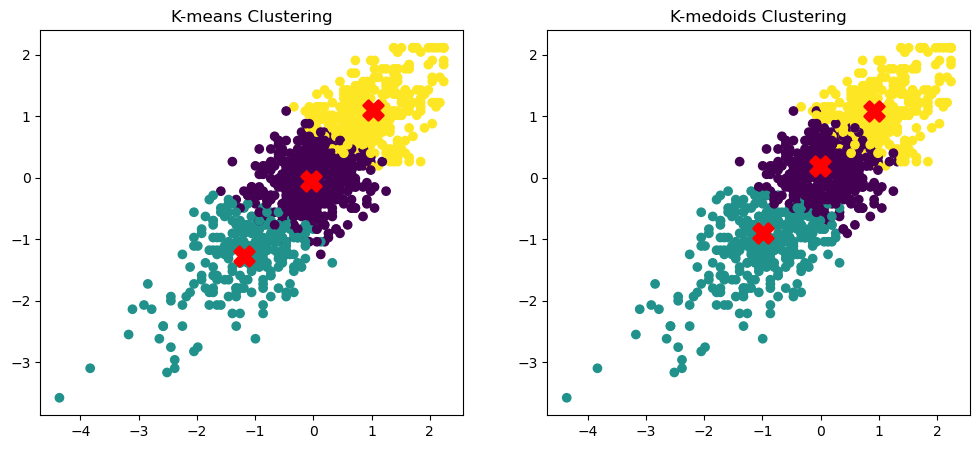

In [44]:
plt.figure(figsize=(12,5))

# K-means plot
plt.subplot(121)
plt.scatter(X_Scaled[:,0], X_Scaled[:,1], c=model.labels_)
plt.scatter(kmeans_centers[:,0], kmeans_centers[:,1], 
           marker='X', s=200, c='red', linewidth=2)
plt.title("K-means Clustering")

# K-medoids plot
plt.subplot(122)
plt.scatter(X_Scaled[:,0], X_Scaled[:,1], c=model2.labels_)
plt.scatter(kmedoids_centers[:,0], kmedoids_centers[:,1],
           marker='X', s=200, c='red', linewidth=2)
plt.title("K-medoids Clustering")

plt.show()

# Step: 15 Implement K- Means without Library
# Sample data points
data = [
    [1, 2], [2, 3], [3, 4],
    [10, 11], [11, 12], [12, 13],
    [50, 51], [51, 52], [52, 53]
]

In [33]:
data = [
    [1, 2], [2, 3], [3, 4],
    [10, 11], [11, 12], [12, 13],
    [50, 51], [51, 52], [52, 53]
]

def euclidean_distance(point1, point2):
    return np.sqrt((point1[0] - point2[0])**2 + (point1[1] - point2[1])**2)



In [34]:
euclidean_distance([1,1], [3,3])

2.8284271247461903

In [35]:
import random as rd

In [36]:
def k_means(k, data, max_iters=100):
    # Step 1: Initialize centroids randomly from data points
    centroids = [data[np.random.randint(len(data))] for _ in range(k)]
    
    for _ in range(max_iters):
        # Step 2: Create clusters by assigning points to nearest centroid
        clusters = [[] for _ in range(k)]
        for point in data:
            distances = [euclidean_distance(point, centroid) for centroid in centroids]
            cluster_idx = np.argmin(distances)
            clusters[cluster_idx].append(point)
        
        # Step 3: Calculate new centroids as cluster means
        new_centroids = []
        for cluster in clusters:
            if not cluster:  # Handle empty clusters
                new_centroid = data[np.random.randint(len(data))]
            else:
                new_centroid = np.mean(cluster, axis=0).tolist()
            new_centroids.append(new_centroid)
        
        # Step 4: Check for convergence
        if np.allclose(centroids, new_centroids):
            break
        centroids = new_centroids
    
    return clusters, centroids

In [37]:
k_means(3, data)

([[[50, 51], [51, 52], [52, 53]],
  [[1, 2], [2, 3], [3, 4]],
  [[10, 11], [11, 12], [12, 13]]],
 [[51.0, 52.0], [2.0, 3.0], [11.0, 12.0]])